In [2]:
import control.matlab as ctrl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [17]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)
        
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [13]:
g = 9.81  # gravitational acceleration
l = 0.2  # length of the arm
M = 0.5  # mass of the arm
mu = 1.5e-2  # viscocity coefficient
J = 1.0e-2  # the moment of inertia

P = ctrl.tf([0, 1], [J, mu, (M * g * l)])

ref_angle = 30  # deg

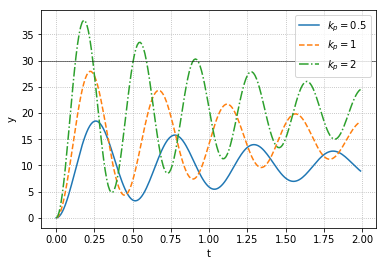

In [15]:
# P control
kp = (0.5, 1, 2)

LS = linestyle_generator()
fig, ax = plt.subplots()

for i in range(3):
    num = [0, kp[i]]
    den = [0, 1]
    K = ctrl.tf(num, den)
    Gyr = ctrl.feedback(P * K, 1)  # closed loop
    y, t = ctrl.step(Gyr, np.arange(0, 2, 0.01))
    
    pltargs = {'ls': next(LS), 'label': '$k_p=$' + str(kp[i])}
    ax.plot(t, y*ref_angle, **pltargs)
    
ax.axhline(ref_angle, color='k', linewidth=0.5)
plot_set(ax, 't', 'y', 'best')

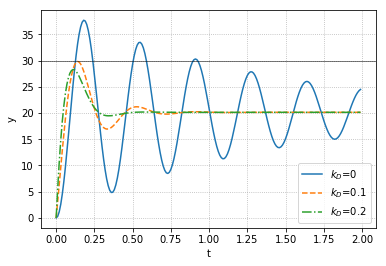

In [22]:
# PD control
kp = 2
kd = (0, 0.1, 0.2)  #differential gain

LS = linestyle_generator()
fig, ax = plt.subplots()

for i in range(3):
    num = [kd[i], kp]
    den = [0, 1]
    K = ctrl.tf(num, den)  # controller
    
    Gyr = ctrl.feedback(P*K, 1)  # transfer function of the closed loop
    
    y, t = ctrl.step(Gyr, np.arange(0, 2, 0.01))
    
    pltargs = {'ls': next(LS), 'label': '$k_D$='+str(kd[i])}
    ax.plot(t, y*ref_angle, **pltargs)
    
ax.axhline(ref_angle, color='k', linewidth=0.5)
plot_set(ax, 't', 'y', 'best')

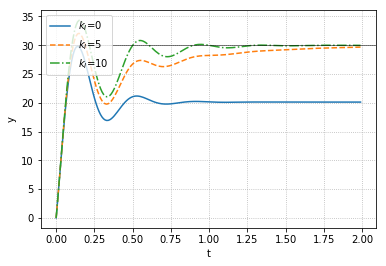

In [23]:
# PID control
kp = 2
kd = 0.1
ki = (0, 5, 10)

LS = linestyle_generator()
fig, ax = plt.subplots()

for i in range(3):
    num = [kd, kp, ki[i]]
    den = [1, 0]
    K = ctrl.tf(num, den)  # PID controller
    
    Gyr = ctrl.feedback(K * P, 1)
    y, t = ctrl.step(Gyr, np.arange(0, 2, 0.01))
    
    pltargs = {'ls': next(LS), 'label': '$k_I$='+str(ki[i])}
    ax.plot(t, y * ref_angle, **pltargs)
    
ax.axhline(ref_angle, color='k', linewidth = 0.5)
plot_set(ax, 't', 'y', 'upper left')